In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone

In [4]:
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_seq_items', 500)

In [5]:
def from_epoch_time(value) -> datetime:
    return pd.to_datetime(value, unit="s")

In [6]:
COUNTRY = "united states"

STOCK_FILE = "data/stock.xlsx"
SHEET_NAME_STOCK = "stock"

STOCK_INFO_FILE = "data/stock_info.xlsx"
SHEET_NAME_STOCK_INFO = "stock_info"

STOCK_STATS_FILE = "data/stock_stats.xlsx"
SHEET_NAME_STOCK_STATS = "stock_stats"

STOCK_DIVIDEND_FILE = "data/stock_dividends.xlsx"
SHEET_NAME_STOCK_DIVIDEND = "stock_dividends"

In [7]:
df_stock = pd.read_excel(STOCK_FILE, sheet_name=SHEET_NAME_STOCK, engine="openpyxl")
df_stock_info = pd.read_excel(STOCK_INFO_FILE, sheet_name=SHEET_NAME_STOCK_INFO, engine="openpyxl")
df_stock_stats = pd.read_excel(STOCK_STATS_FILE, sheet_name=SHEET_NAME_STOCK_STATS, engine="openpyxl")
df_stock_dividend = pd.read_excel(STOCK_DIVIDEND_FILE, sheet_name=SHEET_NAME_STOCK_DIVIDEND, engine="openpyxl")

In [8]:
# Convert field names to lower case
df_stock = df_stock.rename(columns=str.lower)
df_stock_info = df_stock_info.rename(columns=str.lower)
df_stock_stats = df_stock_stats.rename(columns=str.lower)
df_stock_dividend = df_stock_dividend.rename(columns=str.lower)

# Stocks by Sectors

In [9]:
df_stock["exchange"].unique()

array(['NYQ', 'PNK', 'NMS', 'ASE', 'NGM', 'NCM', 'BTS', 'PCX', 'NAS'],
      dtype=object)

In [10]:
len(df_stock)

9649

In [11]:
df_stock_info["symbol"].describe()

count     8353
unique    8353
top          A
freq         1
Name: symbol, dtype: object

In [12]:
df_stock_info.groupby(by=["sector"], axis=0)["symbol"].count()

sector
Basic Materials            341
Communication Services     378
Consumer Cyclical          631
Consumer Defensive         354
Energy                     381
Financial                    2
Financial Services        2438
Healthcare                1387
Industrials                889
Real Estate                430
Services                     2
Technology                 899
Utilities                  143
Name: symbol, dtype: int64

In [13]:
df_stock_stats["symbol"].describe()

count     8267
unique    8267
top          A
freq         1
Name: symbol, dtype: object

In [14]:
df_stock_stats.groupby(by=["sector"], axis=0)["symbol"].count()

sector
Basic Materials            358
Communication Services     386
Consumer Cyclical          643
Consumer Defensive         363
Consumer Goods               2
Energy                     393
Financial                    1
Financial Services        2336
Healthcare                1390
Industrials                905
Real Estate                431
Services                     2
Technology                 911
Utilities                  146
Name: symbol, dtype: int64

In [15]:
df_sector = df_stock_info.groupby(by=["sector"], axis=0)["symbol"].count()

array([<AxesSubplot:ylabel='symbol'>], dtype=object)

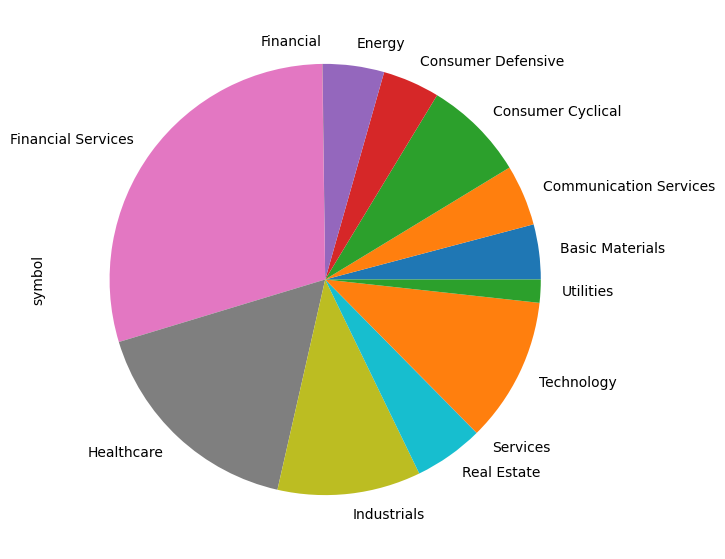

In [16]:
df_sector.plot.pie(subplots=True,figsize=(7, 7))

# Dividend Yield - Last 5 Years

## All Stocks

In [17]:
#df_stock_stats.dtypes

In [18]:
df_stock_stats["lastdividenddate"] = df_stock_stats["lastdividenddate"].apply(from_epoch_time)

In [19]:
df_yield = df_stock_stats.sort_values(by=["fiveyearavgdividendyield"], ascending=False)[["symbol","name","sector","fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate", "threeyearaveragereturn", "fiveyearaveragereturn" ]]

In [20]:
df_yield[df_yield["lastdividenddate"].dt.year == 2022].head(30)

,symbol,name,sector,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate,threeyearaveragereturn,fiveyearaveragereturn
1439,CEN,Center Coast Brookfield MLP & E,Financial Services,24.95,0.225,2022-09-13,NaN,NaN
1530,CHKR,CHESAPEAKE GRANITE WASH TR,Energy,22.62,0.085,2022-08-18,NaN,NaN
5335,NTG,"Tortoise Midstream Energy Fund,",Financial Services,20.49,0.770,2022-08-23,NaN,NaN
2893,FMO,Fiduciary/Claymore Energy Infra,Financial Services,20.12,0.245,2022-02-14,NaN,NaN
1617,CLM,111422,Financial Services,19.93,0.181,2022-09-14,NaN,NaN
1828,CRF,33138,Financial Services,19.61,0.173,2022-09-14,NaN,NaN
5632,OXLC,Oxford Lane Capital Corp.,Financial Services,18.62,0.075,2022-09-15,NaN,NaN
4092,IVR,INVESCO MORTGAGE CAPITAL INC,Real Estate,18.20,0.900,2022-07-08,NaN,NaN
5575,ORC,"Orchid Island Capital, Inc.",Real Estate,18.03,0.160,2022-08-30,NaN,NaN
2340,ECTM,ECA Marcellus Trust I,Energy,17.98,0.176,2022-08-18,NaN,NaN


## By Sectors

In [21]:
df_yield_sector = df_stock_stats.sort_values(by=["sector", "fiveyearavgdividendyield"], ascending=False)[["symbol","name", "sector", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]
df_yield_sector = df_yield_sector[ (df_yield_sector["lastdividenddate"].dt.year == 2022) & (df_yield_sector["fiveyearavgdividendyield"].notnull())]

In [22]:
df_yield_sector.groupby(by=["sector"]).head(5)

,symbol,name,sector,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
6937,SPH,"Suburban Propane Partners, L.P.",Utilities,11.04,0.3250,2022-08-01
3290,GNE-PA,Genie Energy Ltd. Series 2012 -,Utilities,7.67,0.1594,2022-08-05
1727,CNTHP,CONNECTICUT LIGHT & POWER CO,Utilities,5.68,0.8200,2022-07-07
1708,CNLPL,CONNECTICUT LIGHT & POWER CO,Utilities,5.62,0.8100,2022-09-08
4017,IPWLK,INDIANAPOLIS POWER & LIGHT CO,Utilities,5.49,1.4130,2022-09-14
4813,MINDP,"MIND Technology, Inc. - Series",Technology,11.15,0.5630,2022-04-13
5378,NVEC,NVE Corporation,Technology,5.85,1.0000,2022-07-29
7177,TAIT,Taitron Components Incorporated,Technology,4.87,0.0450,2022-08-11
3791,IBM,International Business Machines,Technology,4.76,1.6500,2022-08-09
8176,XRX,Xerox Holdings Corporation,Technology,4.15,0.2500,2022-06-29


In [23]:
df_stock_dividend[df_stock_dividend["symbol"] == "NCMI"]

,date,dividend,payment date,type,yield,name,sector,symbol
28893,2022-08-19,0.03,2022-09-06,quarterly,7.10%,"National CineMedia, Inc.",Communication Services,NCMI
28894,2022-05-20,0.03,2022-06-07,quarterly,9.02%,"National CineMedia, Inc.",Communication Services,NCMI
28895,2022-03-16,0.05,2022-03-31,quarterly,7.91%,"National CineMedia, Inc.",Communication Services,NCMI
28896,2021-11-19,0.05,2021-12-07,quarterly,5.73%,"National CineMedia, Inc.",Communication Services,NCMI
28897,2021-08-20,0.05,2021-09-06,quarterly,7.72%,"National CineMedia, Inc.",Communication Services,NCMI
28898,2021-05-20,0.05,2021-06-07,quarterly,4.44%,"National CineMedia, Inc.",Communication Services,NCMI
28899,2021-03-19,0.05,2021-04-05,quarterly,3.64%,"National CineMedia, Inc.",Communication Services,NCMI
28900,2020-11-13,0.07,2020-12-01,quarterly,9.00%,"National CineMedia, Inc.",Communication Services,NCMI
28901,2020-08-14,0.07,2020-08-31,quarterly,8.92%,"National CineMedia, Inc.",Communication Services,NCMI
28902,2020-05-15,0.07,2020-06-01,quarterly,10.14%,"National CineMedia, Inc.",Communication Services,NCMI


# EPS

## All Stocks

### Trailing EPS

In [24]:
df_trailing_eps = df_stock_stats.sort_values(by=["trailingeps"], ascending=False)[["symbol","name","sector", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [25]:
df_trailing_eps.head(10)

,symbol,name,sector,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
5706,PCOA,PENDRELL CORPORATION,Industrials,18555.000,NaN,3080.000,2017-12-14
1132,BRK-A,Berkshire Hathaway Inc.,Financial Services,7167.230,NaN,NaN,NaT
4687,MCHB,MECHANICS BANK RICHMOND CALIFOR,Financial Services,3207.990,NaN,1168.000,2022-08-17
2809,FINN,FIRST NATIONAL OF NEBRASKA INC,Financial Services,1810.310,NaN,30.000,2022-08-15
4454,LICT,LICT CORPORATION,Communication Services,1103.240,NaN,194.000,2002-01-25
6936,SPGZ,SPECTRUM GROUP INT,Consumer Cyclical,910.570,NaN,NaN,NaT
2860,FMBL,FARMERS & MERCHANTS BANK (CALIF,Financial Services,909.250,1.36,28.000,2022-09-14
6575,SBNC,SOUTHERN BANCSHARES N C INC,Financial Services,547.293,0.27,6.250,2022-08-31
5386,NVR,"NVR, Inc.",Consumer Cyclical,409.610,NaN,0.167,1990-02-23
3205,GGLT,GIANT GROUP,Consumer Cyclical,375.990,NaN,NaN,NaT


### Forward EPS

In [26]:
df_forward_eps = df_stock_stats.sort_values(by=["forwardeps"], ascending=False)[["symbol","name","sector", "forwardeps", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [27]:
df_forward_eps.head(10)

,symbol,name,sector,forwardeps,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
1132,BRK-A,Berkshire Hathaway Inc.,Financial Services,22454.90,7167.23,NaN,NaN,NaT
5386,NVR,"NVR, Inc.",Consumer Cyclical,373.78,409.61,NaN,0.167,1990-02-23
4969,MS,Morgan Stanley,Financial Services,154.66,7.40,2.46,0.775,2022-07-28
803,AZO,"AutoZone, Inc.",Consumer Cyclical,143.18,116.00,NaN,NaN,NaT
996,BKNG,Booking Holdings Inc. Common St,Consumer Cyclical,122.59,37.30,NaN,NaN,NaT
2726,FCNCA,"First Citizens BancShares, Inc.",Financial Services,85.95,55.73,0.31,0.470,2022-08-30
4835,MKL,Markel Corporation,Financial Services,84.51,1.77,NaN,NaN,NaT
8189,Y,Alleghany Corporation,Financial Services,83.53,25.83,NaN,15.000,2020-03-04
5785,PFE,"Pfizer, Inc.",Healthcare,59.06,5.14,3.60,0.400,2022-07-28
1264,CABO,"Cable One, Inc.",Communication Services,57.28,56.54,0.70,2.850,2022-08-29


## By Sectors

### Trailing EPS

In [28]:
df_trailing_eps_sector = df_stock_stats.sort_values(by=["sector", "trailingeps"], ascending=False)[["symbol","name", "sector", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [29]:
df_trailing_eps_sector.groupby(by=["sector"]).head(5)

,symbol,name,sector,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
1705,CNLHN,CONNECTICUT LIGHT & POWER CO,Utilities,74.686,4.21,0.4880,2022-08-09
1706,CNLHO,CONNECTICUT LIGHT & POWER CO,Utilities,74.686,4.54,0.5625,2022-07-07
1708,CNLPL,CONNECTICUT LIGHT & POWER CO,Utilities,74.686,5.62,0.8100,2022-09-08
1709,CNLPM,CONNECTICUT LIGHT & POWER CO,Utilities,74.686,4.31,0.5150,2022-07-07
1710,CNLTL,CONNECTICUT LIGHT & POWER CO,Utilities,74.686,NaN,0.4750,2022-07-07
2392,EINF,ENTERPRISE INFORMATICS INC,Technology,51.000,NaN,16.4600,2011-03-24
4541,LRCX,Lam Research Corporation,Technology,32.750,1.40,1.7250,2022-09-13
729,AVGO,Broadcom Inc.,Technology,23.160,2.99,4.1000,2022-09-21
4257,KLAC,KLA Corporation,Technology,21.920,1.81,1.3000,2022-08-12
730,AVGOP,Broadcom Inc. - 8.00% Mandatory,Technology,20.180,NaN,20.0000,2022-09-14


### Forward EPS

In [30]:
df_forward_eps_sector = df_stock_stats.sort_values(by=["sector", "forwardeps"], ascending=False)[["symbol","name", "sector", "forwardeps", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [31]:
df_forward_eps_sector.groupby(by=["sector"]).head(5)

,symbol,name,sector,forwardeps,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
6988,SRE,Sempra Energy,Utilities,9.05,3.470,3.03,1.145,2022-07-06
2577,ETR,Entergy Corporation,Utilities,6.75,6.040,3.77,1.010,2022-08-10
2242,DTE,DTE Energy Company,Utilities,6.28,4.070,3.19,0.885,2022-09-16
679,ATO,Atmos Energy Corporation,Utilities,5.95,5.470,2.24,0.680,2022-08-19
2256,DUK,Duke Energy Corporation (Holdin,Utilities,5.74,4.940,4.11,1.005,2022-08-11
729,AVGO,Broadcom Inc.,Technology,40.52,23.160,2.99,4.100,2022-09-21
4541,LRCX,Lam Research Corporation,Technology,35.70,32.750,1.40,1.725,2022-09-13
4257,KLAC,KLA Corporation,Technology,23.46,21.920,1.81,1.300,2022-08-12
8217,ZBRA,Zebra Technologies Corporation,Technology,20.30,9.230,NaN,NaN,NaT
1269,CACI,"CACI International, Inc.",Technology,20.21,15.310,NaN,NaN,NaT


# PE Ratio

## All Stocks

In [54]:
PE_FROM = 10
PE_TO = 15

### Trailing PE

In [55]:
#df_stock_stats.replace([np.inf, -np.inf], 0, inplace=True)
df_trailing_pe = df_stock_stats.sort_values(by=["trailingpe"], ascending=False)[["symbol","name","sector", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [56]:
df_trailing_pe[(df_trailing_pe["trailingpe"] >= PE_FROM) & (df_trailing_pe["trailingpe"] <= PE_TO)].head(10)

,symbol,name,sector,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
4797,MHGU,MERITAGE HOSPITALITY GROUP INC,Consumer Cyclical,15.000000,1.350,NaN,0.120,2022-09-14
4266,KLYG,KELYNIAM GLOBAL INC,Healthcare,14.999999,0.007,NaN,NaN,NaT
7583,UCTT,"Ultra Clean Holdings, Inc.",Technology,14.988571,1.750,NaN,NaN,NaT
7859,VPG,"Vishay Precision Group, Inc.",Technology,14.975491,2.040,NaN,NaN,NaT
1835,CRK,"Comstock Resources, Inc.",Energy,14.966942,1.210,NaN,0.625,2014-12-03
5503,OKE,"ONEOK, Inc.",Energy,14.960227,3.520,6.76,0.935,2022-07-29
1082,BOAC,Bluescape Opportunities Acquisi,Financial Services,14.955224,0.670,NaN,NaN,NaT
1000,BKSC,Bank of South Carolina Corp.,Financial Services,14.954955,1.110,3.38,0.170,2022-07-05
1081,BOAC-UN,Bluescape Opportunities Acquisi,Financial Services,14.940476,0.672,NaN,NaN,NaT
3516,HCIC,Hennessy Capital Investment Cor,Financial Services,14.939393,0.660,NaN,NaN,NaT


### Forward PE

In [59]:
df_forward_pe = df_stock_stats.sort_values(by=["forwardpe"], ascending=False)[["symbol","name","sector", "forwardpe", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [60]:
df_forward_pe[(df_forward_pe["forwardpe"] >= PE_FROM) & (df_forward_pe["forwardpe"] <= PE_TO)].head(10)

,symbol,name,sector,forwardpe,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
4604,LYFT,"Lyft, Inc.",Technology,14.989795,NaN,-2.292,NaN,NaN,NaT
1469,CFFN,"Capitol Federal Financial, Inc.",Financial Services,14.966665,14.483871,0.620,2.81,0.085,2022-08-04
5052,MWA,MUELLER WATER PRODUCTS,Industrials,14.911765,18.436363,0.550,1.76,0.058,2022-08-09
8216,ZBH,"Zimmer Biomet Holdings, Inc.",Healthcare,14.875350,76.963770,1.380,0.75,0.240,2022-06-24
7987,WETF,"WisdomTree Investments, Inc.",Financial Services,14.875001,52.888890,0.090,2.43,0.030,2022-08-09
4208,KBR,"KBR, Inc.",Industrials,14.856678,45.610000,1.000,1.38,0.120,2022-09-14
1233,BX,The Blackstone Group Inc.,Financial Services,14.852174,15.612433,5.470,4.68,1.270,2022-07-29
7607,UHAL,Amerco,Industrials,14.847568,8.954749,55.910,NaN,0.500,2022-09-02
725,AVD,American Vanguard Corporation,Basic Materials,14.846154,21.685392,0.890,0.42,0.025,2022-06-23
163,AEHR,Aehr Test Systems,Technology,14.817308,45.323530,0.340,NaN,NaN,NaT


## By Sectors

### Trailing PE

In [61]:
df_trailing_pe_sector = df_stock_stats.sort_values(by=["sector", "trailingpe"], ascending=False)[["symbol","name", "sector", "trailingpe", "forwardpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [62]:
df_trailing_pe_sector[(df_trailing_pe_sector["trailingpe"] >= PE_FROM) & (df_trailing_pe_sector["trailingpe"] <= PE_TO)].groupby(by=["sector"]).head(5)

,symbol,name,sector,trailingpe,forwardpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
5957,PNW,Pinnacle West Capital Corporati,Utilities,14.688660,16.961905,4.850,3.78,0.8500,2022-07-29
6986,SRCU,SPIRE INC UNIT EXP 01/03/2024,Utilities,12.272502,NaN,4.044,NaN,0.9380,2022-08-12
5617,OTTR,Otter Tail Corporation,Utilities,10.488039,15.436620,6.270,2.91,0.4130,2022-08-12
171,AEPPZ,American Electric Power Company,Utilities,10.337165,NaN,5.220,NaN,0.7660,2022-08-11
7583,UCTT,"Ultra Clean Holdings, Inc.",Technology,14.988571,6.029885,1.750,NaN,NaN,NaT
7859,VPG,"Vishay Precision Group, Inc.",Technology,14.975491,11.750000,2.040,NaN,NaN,NaT
4749,MEI,"Methode Electronics, Inc.",Technology,14.821428,11.283988,2.520,1.25,0.1400,2022-07-14
5219,NLOK,NortonLifeLock Inc.,Technology,14.723777,10.797436,1.430,1.72,0.1250,2022-08-19
1877,CSCO,"Cisco Systems, Inc.",Technology,14.592199,10.828948,2.820,2.92,0.3800,2022-07-05
6931,SPG,"Simon Property Group, Inc.",Real Estate,14.068644,15.055093,6.410,5.79,1.7500,2022-09-08


### Forward PE

In [63]:
df_forward_pe_sector = df_stock_stats.sort_values(by=["sector", "forwardpe"], ascending=False)[["symbol","name", "sector", "forwardpe", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [65]:
df_forward_pe_sector[(df_forward_pe_sector["forwardpe"] >= PE_FROM) & (df_forward_pe_sector["forwardpe"] <= PE_TO)].groupby(by=["sector"]).head(5)

,symbol,name,sector,forwardpe,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
323,ALE,"Allete, Inc.",Utilities,14.419847,15.785515,3.590,3.46,0.650,2022-08-12
177,AES,The AES Corporation,Utilities,14.221591,NaN,-0.223,3.22,0.158,2022-07-29
2394,EIX,Edison International,Utilities,13.567011,49.473686,1.330,3.98,0.700,2022-07-01
7605,UGI,UGI Corporation,Utilities,10.686521,5.428344,6.280,2.83,0.360,2022-09-14
5697,PCG,Pacific Gas & Electric Co.,Utilities,10.158536,124.950000,0.100,NaN,0.530,2017-09-28
4604,LYFT,"Lyft, Inc.",Technology,14.989795,NaN,-2.292,NaN,NaN,NaT
163,AEHR,Aehr Test Systems,Technology,14.817308,45.323530,0.340,NaN,NaN,NaT
5086,NATI,National Instruments Corporatio,Technology,14.647726,48.949364,0.790,2.40,0.280,2022-08-05
6521,RXT,"Rackspace Technology, Inc.",Technology,14.647058,NaN,-0.920,NaN,NaN,NaT
5329,NTCT,"NetScout Systems, Inc.",Technology,14.589861,60.884617,0.520,NaN,NaN,NaT


# PEG

## All Stocks

In [69]:
PEG_TARGET = 1

In [70]:
df_peg = df_stock_stats.sort_values(by=["pegratio"], ascending=False)[["symbol","name","sector", "pegratio", "trailingpe", "trailingeps", "fiveyearavgdividendyield", "lastdividendvalue", "lastdividenddate" ]]

In [76]:
df_peg[df_peg["pegratio"] < PEG_TARGET].head(30)

,symbol,name,sector,pegratio,trailingpe,trailingeps,fiveyearavgdividendyield,lastdividendvalue,lastdividenddate
6255,RBCAA,"Republic Bancorp, Inc.",Financial Services,0.99,8.970589,4.42,2.56,0.341000,2022-09-15
658,ATEN,"A10 Networks, Inc.",Technology,0.99,10.125000,1.28,NaN,0.050000,2022-08-12
844,BBQ,"BBQ Holdings, Inc.",Consumer Cyclical,0.99,15.531531,1.11,NaN,NaN,NaT
3715,HTLD,"Heartland Express, Inc.",Industrials,0.99,8.079546,1.76,0.43,0.020000,2022-06-24
4807,MIDD,The Middleby Corporation,Industrials,0.99,15.705883,8.16,NaN,0.066667,2004-06-02
4535,LPTX,"Leap Therapeutics, Inc.",Healthcare,0.99,NaN,-0.44,NaN,NaN,NaT
6885,SNV,Synovus Financial Corp.,Financial Services,0.99,7.866388,4.79,3.12,0.340000,2022-09-14
4627,MAN,ManpowerGroup,Industrials,0.99,8.704516,7.75,2.45,1.360000,2022-05-31
4148,JNPR,"Juniper Networks, Inc.",Technology,0.98,22.313560,1.18,2.73,0.210000,2022-08-31
7087,STT,State Street Corporation,Financial Services,0.98,8.800830,7.23,2.62,0.570000,2022-06-30


## By Sectors